In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/RestaurantVisitors.csv', index_col= 'date', parse_dates= True)
data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [4]:
data.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [8]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq=None)

In [9]:
data.index.freq = 'D'
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq='D')

In [10]:
data.shape

(517, 8)

In [11]:
data.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [12]:
df = data.dropna()
df.isna().any()

weekday         False
holiday         False
holiday_name    False
rest1           False
rest2           False
rest3           False
rest4           False
total           False
dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [15]:
df.select_dtypes(include= np.float64).columns

Index(['rest1', 'rest2', 'rest3', 'rest4', 'total'], dtype='object')

In [19]:
for i in list(df.select_dtypes(include= np.float64).columns):
    df[i] = df[i].astype(int)

In [20]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


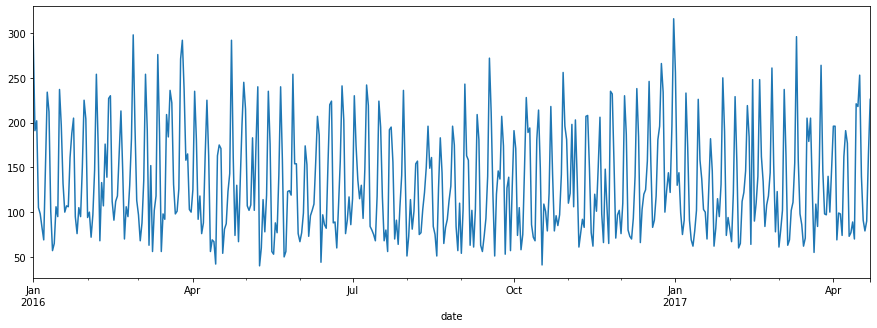

In [21]:
df['total'].plot(figsize = (15,5))
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

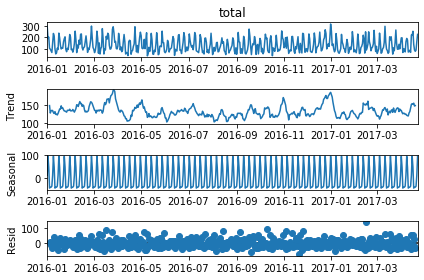

In [24]:
# check for trend and seasonality using decomposition plots
results = seasonal_decompose(df['total'])
results.plot();

In [25]:
df.shape

(478, 8)

In [26]:
# split the data
train = df.iloc[:436]
test = df.iloc[436:]

In [27]:
# finding SARIMA parameter orders
auto_arima(df['total'], seasonal= True, m = 7).summary() # it is weekly data

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: Convergen

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Wed, 22 Jul 2020   AIC                           4845.442
Time:                                   17:09:04   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# model building
model = SARIMAX(train['total'], order= (1, 0, 0), seasonal_order= (2, 0, 0, 7), enforce_invertibility= False )

In [30]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 22 Jul 2020   AIC                           4457.403
Time:                                   17:13:19   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# predictions on test data
start = len(train)
end = start + len(test) -1
predictions = results.predict(start= start, end= end).rename('SARIMA model')

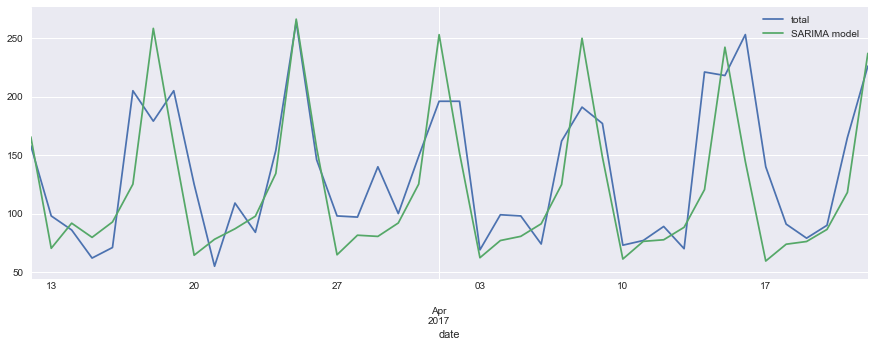

In [34]:
plt.style.use('seaborn')
test['total'].plot(figsize =(15,5), legend = True)
predictions.plot(legend = True)
plt.show()

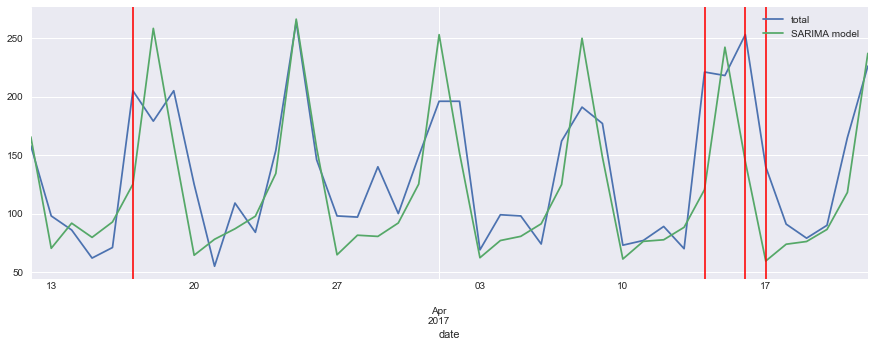

In [36]:
# to find holiday peaks
ax = test['total'].plot(figsize =(15,5), legend = True)
predictions.plot(legend = True)

for day in test[test['holiday'] == 1].index:
    ax.axvline(x = day, color = 'red', alpha = 0.9)

In [38]:
# model evaluation
from statsmodels.tools.eval_measures import rmse

In [39]:
rmse(test['total'], predictions)

41.263154972797885

### How to add input attributes which plays a role
 - for SARIMAX even though we provide input attribute at the time of model building but we have to know what will be the value of input variable for sure otherwise we can't forecast 2 attributes at a time

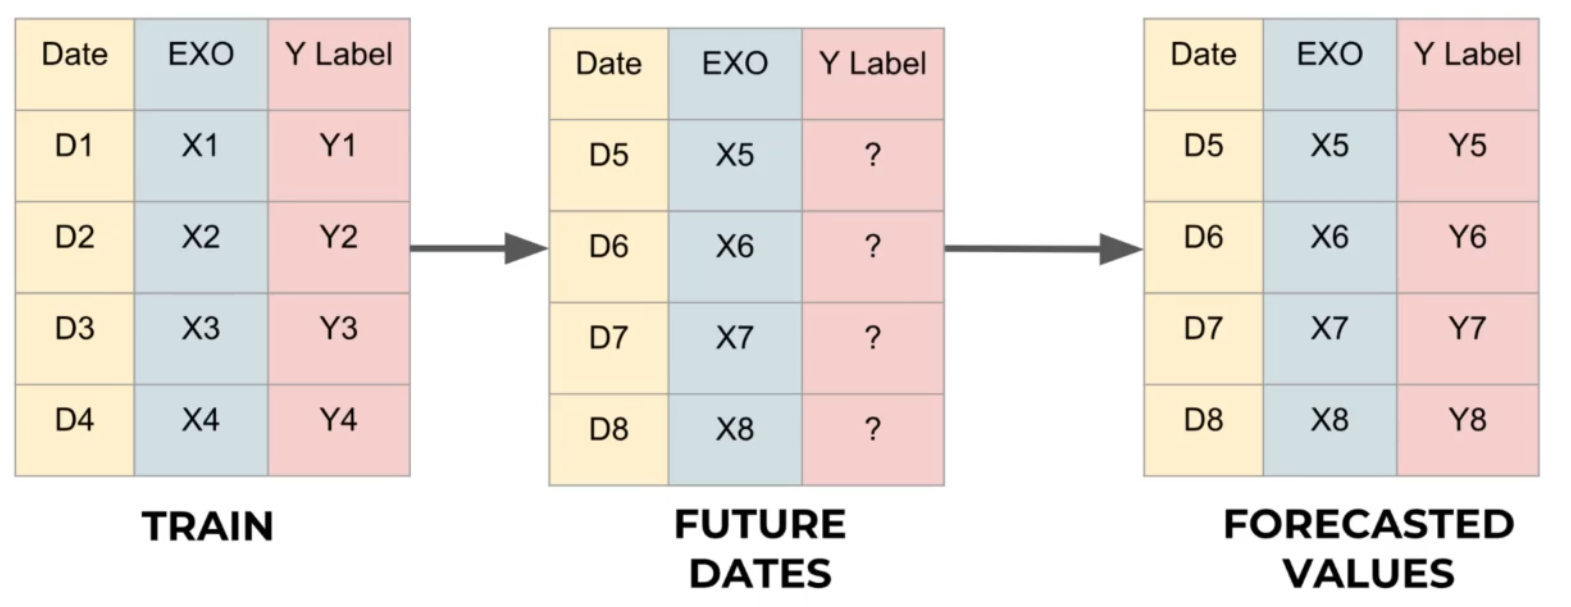

In [41]:
from PIL import Image
image = Image.open('sarima.png')
image

In [43]:
df[['holiday']].head()

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0


In [45]:
## adding exogenous attribute
auto_arima(df['total'], exogenous= df[['holiday']], seasonal= True, m = 7).summary() # always add a dataframe as exogenous attribute

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimizati

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -2368.722
Date:                                Wed, 22 Jul 2020   AIC                           4755.444
Time:                                        17:39:27   BIC                           4792.971
Sample:                                             0   HQIC                          4770.198
                                                - 478                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.4773     15.310      6.498      0.000      69.471     129.484
x1            55.2059      4.645     11.885      0.000      46.102      64.310
ar.L1         -0.9984      0.004   -231.242      0.000      -1.007      -0.990
ma.L1          0.9787      0.019     51.960      0.000       0.942       1.016
ar.S.L7       -0.1765      0.051     -3.457      0.001      -0.276      -0.076
ar.S.L14       0.8235      0.043     19.162      0.000       0.739       0.908
ma.S.L7        0.6744      0.109      6.180      0.000       0.460       0.888
ma.S.L14      -0.3255      0.058     -5.585      0.000      -0.440      -0.211
sigma2      1111.5958     85.481     13.004      0.000     944.056    1279.135
===================================================================================
Ljung-Box (Q):                      144.94   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               0.91   Skew:                             0.23
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# model building with exogenous variable
model = SARIMAX(train['total'], exog= train[['holiday']],order= (1,0,1), 
                seasonal_order= (2, 0, [1, 2], 7), enforce_invertibility= False)


In [49]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -2244.575
Date:                                Wed, 22 Jul 2020   AIC                           4505.150
Time:                                        17:43:59   BIC                           4537.771
Sample:                                    01-01-2016   HQIC                          4518.024
                                         - 03-11-2017                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      186.1752      6.422     28.989      0.000     173.588     198.763
ar.L1          0.9774      0.034     28.912      0.000       0.911       1.044
ma.L1         -0.9579      0.050    -19.141      0.000      -1.056      -0.860
ar.S.L7        0.0066      0.022      0.295      0.768      -0.037       0.050
ar.S.L14       0.9934      0.022     44.512      0.000       0.950       1.037
ma.S.L7        0.0355      0.067      0.531      0.595      -0.095       0.166
ma.S.L14      -1.0086      0.076    -13.312      0.000      -1.157      -0.860
sigma2      1479.2357    183.508      8.061      0.000    1119.566    1838.906
===================================================================================
Ljung-Box (Q):                       51.18   Jarque-Bera (JB):               566.58
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -1.46
Prob(H) (two-sided):                  0.42   Kurtosis:                         7.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# predictions on test data
start = len(train)
end = start + len(test) - 1

predictions = result.predict(start= start, end = end, exog = test[['holiday']]).rename('SARIMAX with exog')

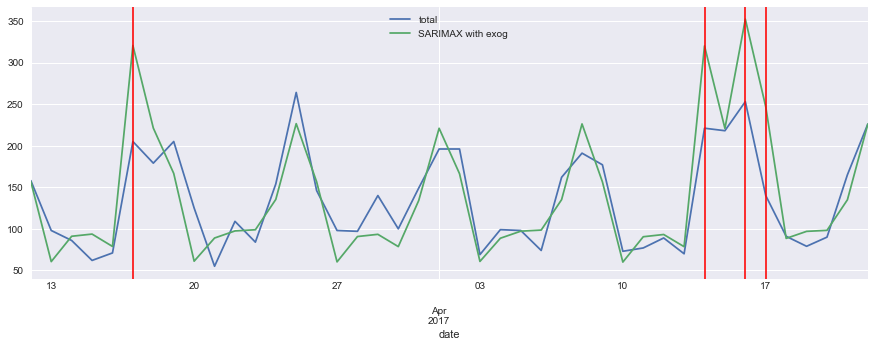

In [53]:
ax = test['total'].plot(figsize =(15,5), legend = True)
predictions.plot(legend = True)

for day in test[test['holiday'] == 1].index:
    ax.axvline(x = day, color = 'red', alpha = 0.9)

In [54]:
rmse(test['total'], predictions)

40.32720941087066

### Forecasting into the future

In [55]:
model = SARIMAX(df['total'], exog= df[['holiday']],order= (1,0,1), 
                seasonal_order= (2, 0, [1, 2], 7), enforce_invertibility= False)
results = model.fit()
results.summary()

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  total   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -2514.879
Date:                                Wed, 22 Jul 2020   AIC                           5045.758
Time:                                        17:52:26   BIC                           5079.115
Sample:                                    01-01-2016   HQIC                          5058.872
                                         - 04-22-2017                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      185.4249      5.198     35.675      0.000     175.238     195.612
ar.L1          0.9916      0.024     41.521      0.000       0.945       1.038
ma.L1         -0.9833      0.030    -32.727      0.000      -1.042      -0.924
ar.S.L7        0.0014      0.002      0.887      0.375      -0.002       0.005
ar.S.L14       0.9986      0.002    627.716      0.000       0.995       1.002
ma.S.L7        0.4417      0.041     10.843      0.000       0.362       0.522
ma.S.L14      -1.4595      0.006   -226.519      0.000      -1.472      -1.447
sigma2       651.5414     48.017     13.569      0.000     557.429     745.653
===================================================================================
Ljung-Box (Q):                       80.62   Jarque-Bera (JB):               260.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -1.00
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
data.tail() # you can see here that I know exogeous variable "holiday" into the future and forecasting "total"

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [60]:
data[477:].head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [61]:
exog_forecast = data[478:][['holiday']]
exog_forecast.head()

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0


In [62]:
exog_forecast.shape

(39, 1)

In [67]:
# forecast
fcast = results.predict(start= len(df), end= len(df)+38,exog = exog_forecast).rename(' final SARIMAX forecast')

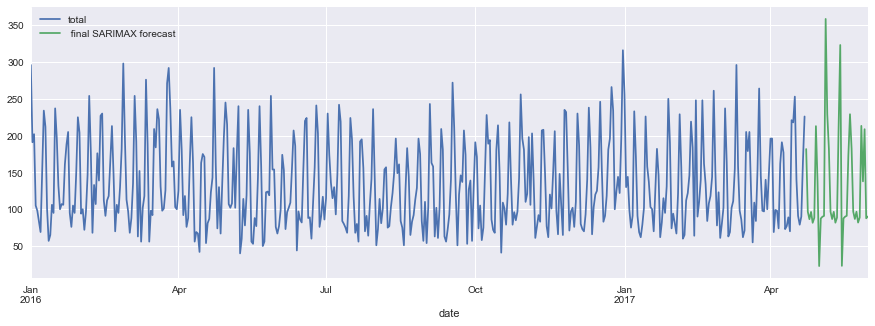

In [68]:
df['total'].plot(figsize = (15,5), legend = True)
fcast.plot(legend = True)
plt.show()

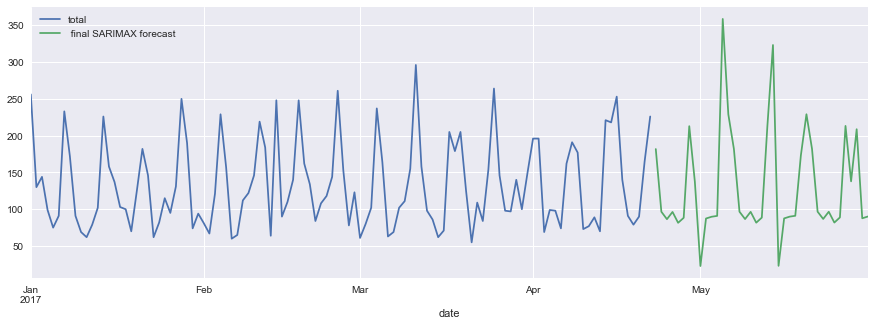

In [69]:
df['total']['2017-01-01':].plot(figsize = (15,5), legend = True)
fcast.plot(legend = True)
plt.show()